Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions
of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.
We will Explore and analyze the data to discover key understandings (not limited to these) such as :
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from skimage.io import imread

In [2]:
# import data

df_airb = pd.read_csv("AB_NYC_2019.csv")

In [3]:
# first 5 rows

df_airb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# last 5 rows

df_airb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
# shape of dataset

df_airb.shape

(48895, 16)

Dataframe has 48895 rows and 16 columns.

In [6]:
# Checking Datatypes and other info

df_airb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# Extracting all columns in the Database

df_airb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
# Identifying column that have null value

df_airb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are null values in the name,neighbourhood_group,last_review,reviews_per_month column.

In [13]:
# Replacing null values in the reviews_per_month with 0

df_airb["reviews_per_month"].fillna(0,inplace = True)

In [14]:
# Checking null values in the reviews_per_month

df_airb["reviews_per_month"].isnull().sum()

0

In [15]:
# Dropping columns that are not significant

df_airb.drop(["last_review","latitude","longitude"],inplace = True,axis=1)

In [16]:
df_airb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [17]:
# Replacing null values in the name with anonymous

df_airb["name"].fillna("Anonymous",inplace = True)

In [18]:
# Replacing null values in the host_name with "Anonymous Host Name"

df_airb["host_name"].fillna("Anonymous Host Name",inplace = True)

In [19]:
# Examining Changes

df_airb.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# 1. What can we learn about different hosts and areas?

firstly, we extract the value_listing_counts of different hosts grouped by their neighbourhood

In [20]:
#grouped host_name and neighbourhoos_group on their host_listing_counts and then  sort the values in descending order
hosts_in_areas = df_airb.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_in_areas.sort_values(by='calculated_host_listings_count', ascending=False)

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1838,Blueground,Manhattan,232
1837,Blueground,Brooklyn,232
7279,Kara,Manhattan,121
7483,Kazuya,Manhattan,103
...,...,...,...
5821,Iman,Brooklyn,1
5822,Imani,Brooklyn,1
5824,Imelda,Queens,1
5825,Imma,Brooklyn,1


In [21]:
#hosts_in_areas.value_counts

top_10_hosts=hosts_in_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(10)

In [22]:
top_10_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1838,Blueground,Manhattan,232
1837,Blueground,Brooklyn,232
7279,Kara,Manhattan,121
7483,Kazuya,Manhattan,103
7482,Kazuya,Brooklyn,103
7484,Kazuya,Queens,103
13220,Sonder,Manhattan,96
6544,Jeremy & Laura,Manhattan,96
2905,Corporate Housing,Manhattan,91


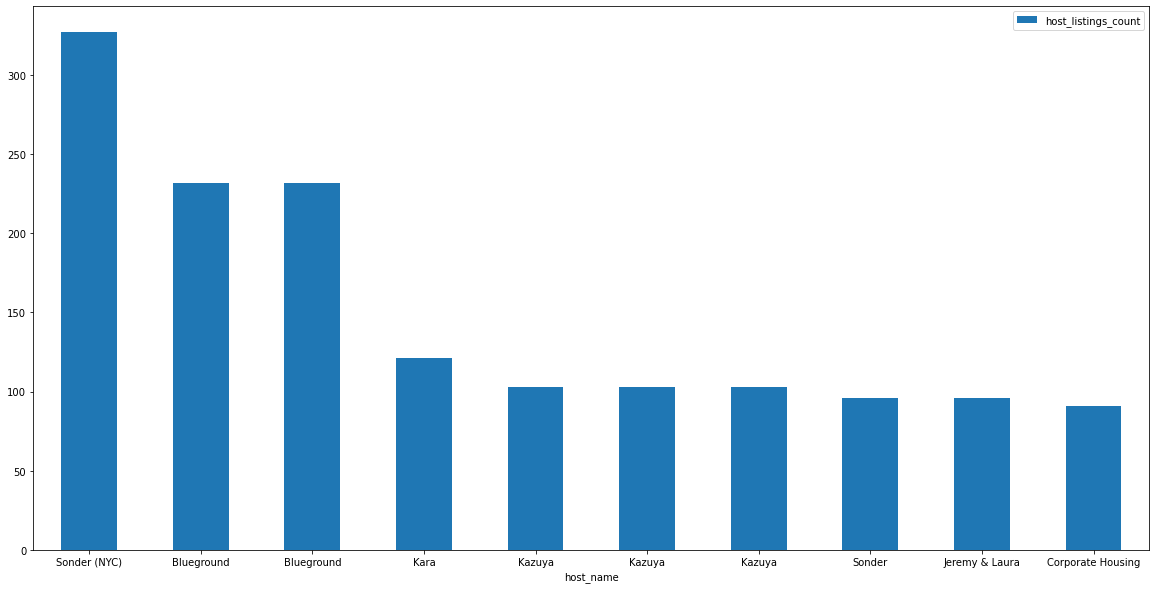

In [24]:
#top_10 hosts and their value listing counts plotted on bar chart
top_10_hosts_for_bar_plot = pd.DataFrame({'host_name':top_10_hosts["host_name"], 'host_listings_count':top_10_hosts["calculated_host_listings_count"]})
ax = top_10_hosts_for_bar_plot.plot.bar(x='host_name', y='host_listings_count', rot=0,figsize=(20,10))


# What can we learn from predictions? (ex: locations, prices, reviews, etc)
According the condition given, we will made our predictions such as firstly, we group different locations and their reviews .Then secondly, we group different locations and their prices and lastly, we group different prices and the review .

In [25]:
#In this we grouped different neighbour_hood group and the number of reviews
loaction_review_data = df_airb.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
loaction_review_data

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


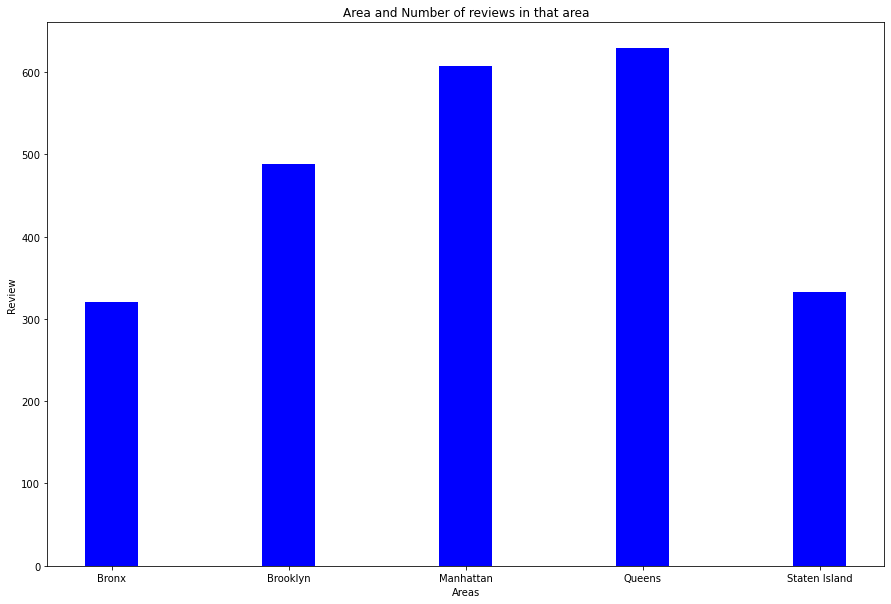

In [26]:
#Plot Bar chart Of Areas(neighbourhood_group) VS Reviews in that areas
Areas = loaction_review_data['neighbourhood_group']
Reviews = loaction_review_data['number_of_reviews']

chart = plt.figure(figsize = (15,10))
 
# drawing the bar plot
plt.bar(Areas, Reviews, color ='blue',
        width = 0.3)
 
plt.xlabel("Areas")
plt.ylabel("Review")
plt.title("Area and Number of reviews in that area")
plt.show()

Analysing this chart we conclude that Brooklyn,Manhattan,Queens has highest number of reviews as compared to Bronx and staten Island As they have average reviews

In [27]:
##In this we grouped different neighbour_hood group and Prices in different areas
loaction_price_data = df_airb.groupby(['neighbourhood_group'])['price'].max().reset_index()
loaction_price_data

,neighbourhood_group,price
0,Bronx,2500
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000


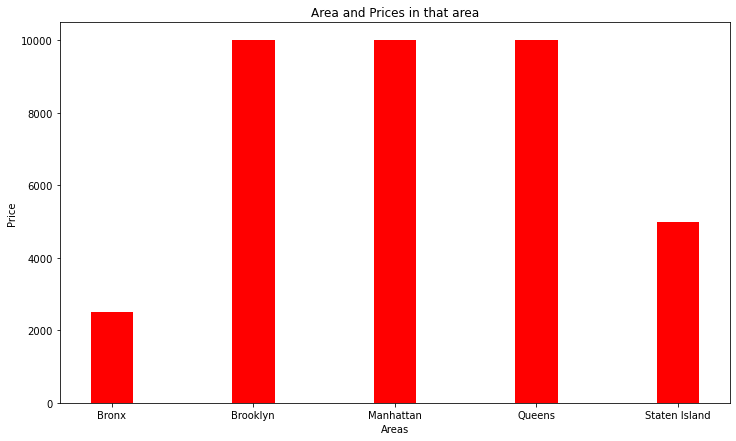

In [28]:
#Plot Bar chart Of Areas(neighbourhood_group) VS Price in that area
Areas = loaction_price_data['neighbourhood_group']
Price = loaction_price_data['price']

chart = plt.figure(figsize = (12,7))
 
# drawing the bar plot
plt.bar(Areas, Price, color ='red',
        width = 0.3)
 
plt.xlabel("Areas")
plt.ylabel("Price")
plt.title("Area and Prices in that area")
plt.show()

Analysing the above chart we concluded that Brooklyn,Manhattan,queens have Higher prices as compared to Bronx And Staten Island

In [29]:
#In this we grouped different Prices and Reviews on the different prices
review_price_data = df_airb.groupby(['price'])['number_of_reviews'].max().reset_index()
review_price_data.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


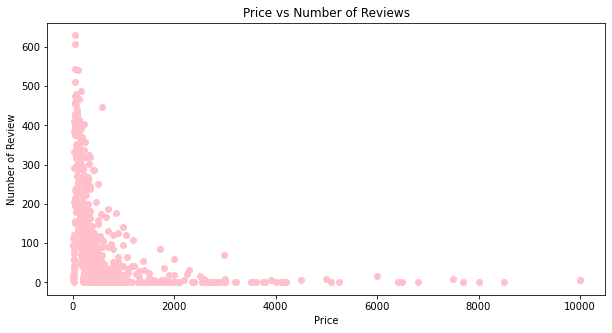

In [30]:
#Plot chart Of Price VS Reviews on the prices
price = review_price_data['price']
review = review_price_data['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(price, review,color='pink')
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

Analysing the above chart we concluded that lower the price ,higher the reviews

Finally , We concluded that Brooklyn,Manhattan,Queens have higher prices and reviews also and the Bronx and staten island have less prices and reviews also as compared to other if we compare all prices and reviews then we find that lower prices has highest reviews

# 3. Which hosts are the busiest and why?

In [33]:
# In this we grouped host_id,host_name,room_type based on number of reviews

busiest_hosts = df_airb.groupby(["host_id","host_name","room_type"])["number_of_reviews"].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by=["number_of_reviews"],ascending = False).head(10)
busiest_hosts

,host_id,host_name,room_type,number_of_reviews
24497,47621202,Dona,Private room,629
7710,4734398,Jj,Private room,607
22225,37312959,Maya,Private room,543
4593,2369681,Carol,Private room,540
19453,26432133,Danielle,Private room,510
13714,12949460,Asa,Entire home/apt,488
1976,792159,Wanda,Private room,480
5059,2680820,Linda,Private room,474
161,42273,Dani,Entire home/apt,467
18297,23591164,Angela,Private room,466


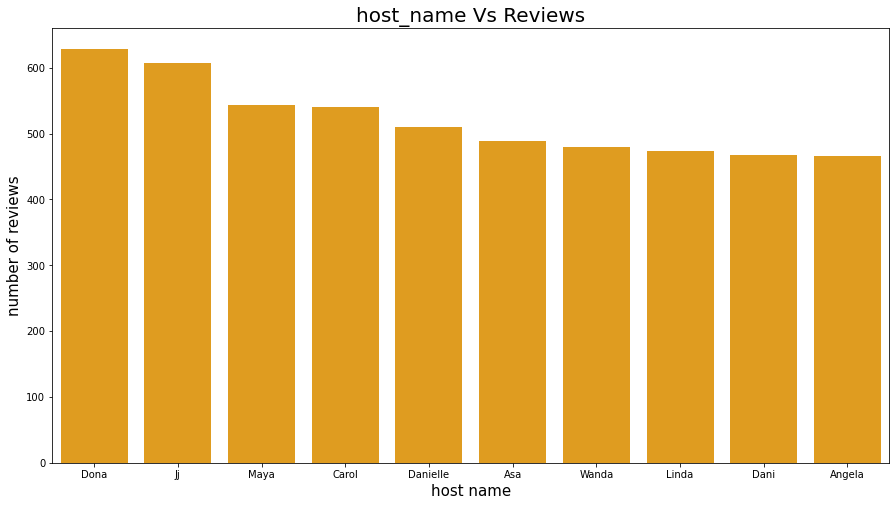

In [37]:
# creating the bar plot on host_name Vs Reviews

plt.figure(figsize = (15,8))
sns.barplot(data = busiest_hosts,x='host_name',y='number_of_reviews',color = 'orange')
plt.title("host_name Vs Reviews",fontsize=20)
plt.xlabel("host name",fontsize = 15)
plt.ylabel("number of reviews",fontsize=15)
plt.show()

while, Analysing the above chart we conclude that Dona,Jj, Maya are the busiest hosts followed by Carol,Danielle,Asa And other hosts. The Host With maximum reviews are the busiest host .

# 4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [39]:
#Grouped data by Neighbourhood_type and minimum_nights spends on that area in different room types.
busiest_areas = df_airb.groupby(["neighbourhood_group","room_type"])["minimum_nights"].count().reset_index()
busiest_areas = busiest_areas.sort_values(by = "minimum_nights",ascending = False)
busiest_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


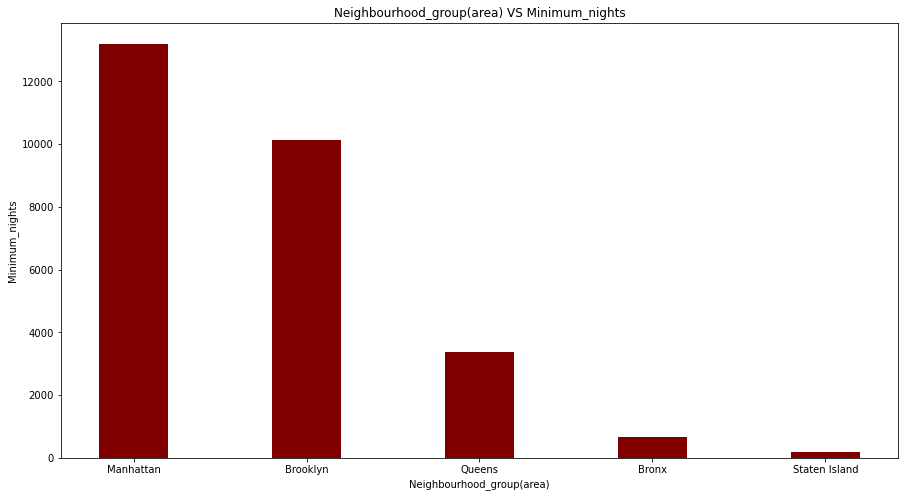

In [43]:
# creating the bar plot Neighbourhood_group(area) VS Minimum_nights
room_type = busiest_areas['neighbourhood_group']
stayed = busiest_areas['minimum_nights']

plt.figure(figsize = (15,8))
plt.bar(room_type, stayed, color ='maroon',
        width = 0.4)
 
plt.title("Neighbourhood_group(area) VS Minimum_nights")
plt.xlabel("Neighbourhood_group(area)")
plt.ylabel("Minimum_nights")
plt.show()

From the above chart we can conclude that, Manhattan was the busiest areas among all followed by Brooklyn,Queens,Bronx,Staten Island respectively.

# We also analysed about the different room types and the reviews given to that so that we can analyse which is the most preferrable room type.

In [44]:
#Grouped Data By Room type and minimum_nights 
minimum_nights_stayed_room = df_airb.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
minimum_nights_stayed_room = minimum_nights_stayed_room.sort_values(by='minimum_nights', ascending=False)
minimum_nights_stayed_room

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


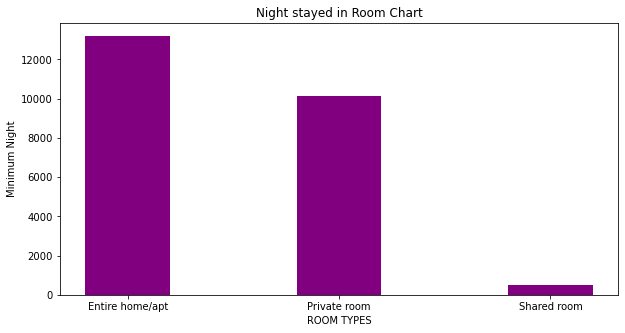

In [45]:
#Bar chart for room_type VS Number_of_reviews
room_type = minimum_nights_stayed_room['room_type']
minimum_nights = minimum_nights_stayed_room['minimum_nights']

fig = plt.figure(figsize = (10, 5))
 
plt.bar(room_type, minimum_nights, color ='purple',
        width = 0.4)
 
plt.xlabel("ROOM TYPES")
plt.ylabel("Minimum Night")
plt.title("Night stayed in Room Chart")
plt.show()

While Analysing the above chart we concluded that Entire home/apt room is most preferrable followed by Private and shared room is least preferred.

# Conclusion:

This Airbnb (NYC 2019) Dataset For The Year 2019 Appeared to be a very rich Dataset with a variety of coloumns that allowed us to do deep data exploration.

First,we have found hosts that take good advantage of the Airbnb platform and provide the most listing.Thus,we found that our top host (Sonder) has 327

listings.

On the basis of reviews the neighbourhood group,Queens has maximum number of
reviews followed by others.so,if there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.

Manhattan is the busiest neighbourhood place as the minimum night spend is maximum compared to others.so,if people are not staying more then one night means they are travellers.
From the above analysis we can conclude that most of the people choose entire home apartment as their first choice.